In [1]:
#Import the necessary libraries and dependencies, including numpy, pandas, BeautifulSoup, matplotlib.pyplot, seaborn, and nltk.
import numpy as np
import pandas as pd
import bs4 as bs
import plotly.express as px
import nltk as nl

In [2]:
#Set up the necessary configurations for plotting and visualization.
import matplotlib.pyplot as plt
import seaborn as sb

In [3]:
#Load the dataset using pandas and store it in a DataFrame, such as data.
tweets= pd.read_csv("Tweets.csv")
tweets.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [6]:
#Clean the dataset by removing rows with low confidence levels (airline_sentiment_confidence <= 0.65).

tweets1 = tweets.loc[tweets["airline_sentiment_confidence"] > 0.65 ]
tweets1.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)
5,570300767074181121,negative,1.0000,Can't Tell,0.6842,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica seriously would pay $30 a fligh...,NaN,2015-02-24 11:14:33 -0800,NaN,Pacific Time (US & Canada)


In [7]:
#Create a new column sentiment based on the airline_sentiment, where negative sentiment is encoded as 1 and non-negative sentiment as 0.
tweets1.replace({'airline_sentiment':{'negative': 1,'neutral':0,'positive':0}},inplace=True)
tweets1.head()

C:\Users\SONY\AppData\Local\Temp\ipykernel_4776\2295407533.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets1.replace({'airline_sentiment':{'negative': 1,'neutral':0,'positive':0}},inplace=True)


,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,0,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
2,570301083672813571,0,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,1,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,1,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)
5,570300767074181121,1,1.0000,Can't Tell,0.6842,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica seriously would pay $30 a fligh...,NaN,2015-02-24 11:14:33 -0800,NaN,Pacific Time (US & Canada)


In [8]:
#Apply text cleaning to the text column using BeautifulSoup to remove HTML tags and special characters. Store the cleaned text in a new column called text_clean.

# Function to remove tags and special characters
def remove_tags_sp(html):
    
    # parse html content
    soup = bs.BeautifulSoup(html, "html.parser") 
    
    for data in soup(['style', 'script']):
        # Remove tags
        data.decompose()
    # return data by retrieving the tag content and remove special characters
    ct = ""
    for string in soup.stripped_strings:           
        special_characters=['@','#','$','*','&']  
        for i in special_characters:
        # Replace the special character with an empty string
            string=string.replace(i,"")
        ct+=string
    return ct


c=[]
for i in range(0,len(tweets1)):
    c.append( remove_tags_sp(tweets1.iloc[i,10]))
tweets1['cleaned_text']=c
tweets1.head()

C:\Users\SONY\AppData\Local\Temp\ipykernel_4776\920418426.py:7: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = bs.BeautifulSoup(html, "html.parser")
C:\Users\SONY\AppData\Local\Temp\ipykernel_4776\920418426.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets1['cleaned_text']=c


,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone,cleaned_text
0,570306133677760513,0,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada),VirginAmerica What dhepburn said.
2,570301083672813571,0,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada),VirginAmerica I didn't today... Must mean I ne...
3,570301031407624196,1,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada),VirginAmerica it's really aggressive to blast ...
4,570300817074462722,1,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada),VirginAmerica and it's a really big bad thing ...
5,570300767074181121,1,1.0000,Can't Tell,0.6842,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica seriously would pay $30 a fligh...,NaN,2015-02-24 11:14:33 -0800,NaN,Pacific Time (US & Canada),VirginAmerica seriously would pay 30 a flight ...


In [9]:
##### Retain only the relevant columns text_clean and sentiment for further analysis.
tweets2=tweets1.loc[:,['cleaned_text','airline_sentiment']]
tweets2.head()

,cleaned_text,airline_sentiment
0,VirginAmerica What dhepburn said.,0
2,VirginAmerica I didn't today... Must mean I ne...,0
3,VirginAmerica it's really aggressive to blast ...,1
4,VirginAmerica and it's a really big bad thing ...,1
5,VirginAmerica seriously would pay 30 a flight ...,1


In [10]:
#Split the cleaned data into training and testing subsets using the train_test_split function, with a test size of 20% and a random state of 1.
from sklearn.model_selection import train_test_split

y=tweets2['airline_sentiment']

#features extraction
x= tweets2['cleaned_text']

#splitting data
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20,random_state=1)


In [11]:
#Extract the text features (X) from the training and testing data, and the corresponding sentiment labels (y).

y=tweets2['airline_sentiment']
x=tweets2['cleaned_text']



In [12]:
#Define the tokenization and stemming functions to preprocess the text data.

import re
def custom_preprocessor(text):
    #lowering the text case
    text = text.lower() 
    # remove special chars
    text = re.sub("\\W"," ",text)
    # Remove all other punctuation (replace with white space)
    regx = re.compile(r"([^\w\s]+)|([_-]+)")  
    text = regx.sub(repl=" ", string=text)
    
    return text

import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
#custom function
def my_tokenizer(text):
    tokens = word_tokenize(text)
    return tokens


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\SONY\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [13]:
#Create a set of English stopwords using NLTK.
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stopWords = list(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\SONY\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [14]:
#Initialize the CountVectorizer with the following configurations : Analyzer: 'word' / Tokenizer: tokenize function / Lowercase: True / ngram_range: (1, 1) / Stop words: English stopwords
def text_vectorizer():
    from sklearn.feature_extraction.text import CountVectorizer
    vectorizer = CountVectorizer(max_features = 50, analyzer='word',tokenizer=my_tokenizer ,preprocessor=custom_preprocessor, lowercase=True, ngram_range = (1, 1),stop_words=stopWords, max_df=0.80, min_df=0.20)
    features = vectorizer.fit_transform(x)
    vectorizer.vocabulary_
    df = pd.DataFrame(data=features.toarray(),columns = vectorizer.get_feature_names_out())
    df['airline_sentiment']=tweets2['airline_sentiment']
    df.dropna(axis=0, how='any', inplace=True)
    df.reindex(index=range(0,len(df)))
    return df

In [16]:
#Implement StratifiedKFold cross-validation with 5 splits.
from sklearn.model_selection import StratifiedKFold
from sklearn import preprocessing

# Create StratifiedKFold object.
skf = StratifiedKFold(n_splits=5)

# Splitting the data into features and labels
 
df=text_vectorizer()
df.head()
y = df.loc[:,'airline_sentiment']

print('Class Ratio:',sum(df['airline_sentiment'])/len(df['airline_sentiment']))

for i, (train_index, test_index) in enumerate(skf.split(df, y)):
     print(f"Fold {i}:")
     print(f"  Train: index={train_index}")
     print(f"  Test:  index={test_index}")
     train = df.iloc[train_index,:]
     test = df.iloc[test_index,:]
     print('Fold',str(i),'Class Ratio:',sum(test['airline_sentiment'])/len(test['airline_sentiment']))


C:\Users\SONY\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Class Ratio: 0.6329034287511797
Fold 0:
  Train: index=[ 2399  2400  2401 ... 12713 12714 12715]
  Test:  index=[   0    1    2 ... 2821 2822 2823]
Fold 0 Class Ratio: 0.6328616352201258
Fold 1:
  Train: index=[    0     1     2 ... 12713 12714 12715]
  Test:  index=[2399 2400 2401 ... 5187 5189 5190]
Fold 1 Class Ratio: 0.6327172630751081
Fold 2:
  Train: index=[    0     1     2 ... 12713 12714 12715]
  Test:  index=[4979 4981 4983 ... 8454 8455 8456]
Fold 2 Class Ratio: 0.6327172630751081
Fold 3:
  Train: index=[    0     1     2 ... 12713 12714 12715]
  Test:  index=[ 6887  6890  6891 ... 10445 10446 10448]
Fold 3 Class Ratio: 0.6331104994101455
Fold 4:
  Train: index=[    0     1     2 ... 10445 10446 10448]
  Test:  index=[ 8969  8978  8985 ... 12713 12714 12715]
Fold 4 Class Ratio: 0.6331104994101455


In [15]:
#Set the random seed to 1 for reproducibility.
import random
random.seed(1)

C:\Users\SONY\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Fold 0:
---------------------------------
SVM
-----------------------------------


C:\Users\SONY\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.675
F1 Score: 0.778
Precision: 0.685
Recall: 0.901
No Skill: ROC AUC=0.500
SVM : ROC AUC=0.605


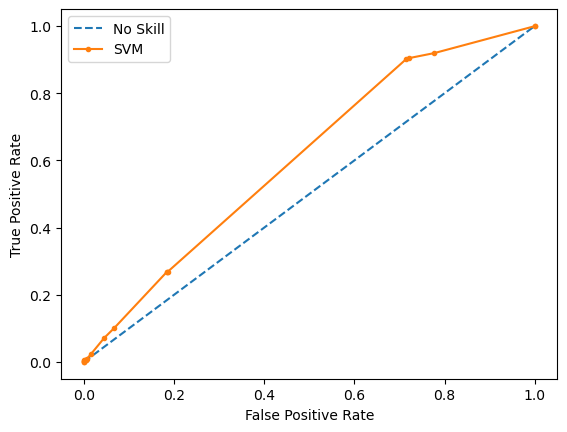

Fold 1:
---------------------------------
SVM
-----------------------------------


C:\Users\SONY\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.598
F1 Score: 0.637
Precision: 0.743
Recall: 0.557
No Skill: ROC AUC=0.500
SVM : ROC AUC=0.614


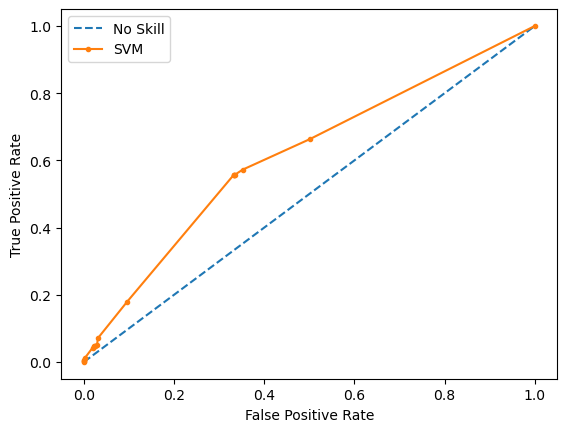

Fold 2:
---------------------------------
SVM
-----------------------------------


C:\Users\SONY\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.529
F1 Score: 0.409
Precision: 0.988
Recall: 0.258
No Skill: ROC AUC=0.500
SVM : ROC AUC=0.628


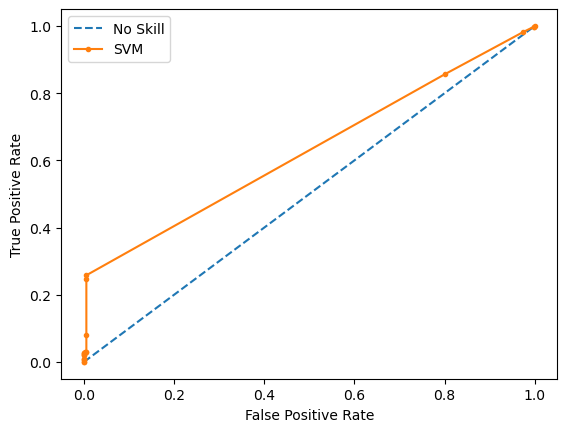

Fold 3:
---------------------------------
SVM
-----------------------------------


C:\Users\SONY\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.440
F1 Score: 0.236
Precision: 0.863
Recall: 0.137
No Skill: ROC AUC=0.500
SVM : ROC AUC=0.636


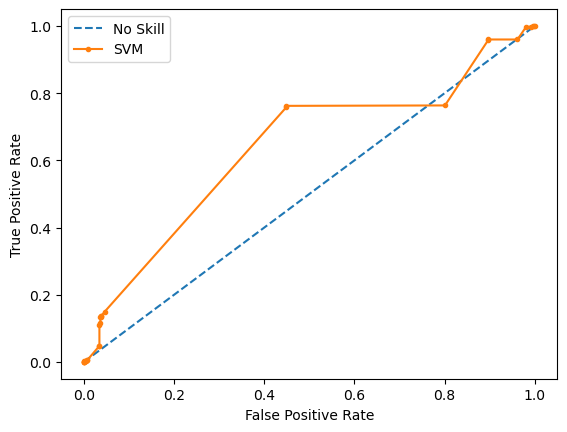

Fold 4:
---------------------------------
SVM
-----------------------------------


C:\Users\SONY\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.633
F1 Score: 0.775
Precision: 0.633
Recall: 1.000
No Skill: ROC AUC=0.500
SVM : ROC AUC=0.600


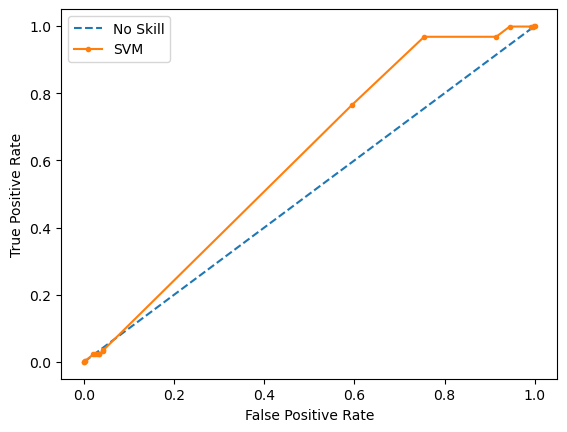

In [41]:
#Build a pipeline for SVM classification, including the vectorizer and SVC with the following configurations: 
#Probability: True / Kernel: "linear" / Class weight: "balanced"

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV

#building pipeline
csv_pipe = Pipeline([
    ('vectorizer', text_vectorizer()), #Step1 - vectorize data
    ('clf', SVC(probability= True,kernel='linear',class_weight= 'balanced')) #step2 - classifier
])


# Create StratifiedKFold object.
skf = StratifiedKFold(n_splits=5)

# Splitting the data into features and labels
y = df.loc[:,'airline_sentiment']

for i, (train_index, test_index) in enumerate(skf.split(df, y)):
    print(f"Fold {i}:")  
    train = df.iloc[train_index,:]
    test = df.iloc[test_index,:]
    X= ['americanair','flight','united','usairways']  
    y = ['airline_sentiment']
    X_train = train[X]
    y_train = train[y]
    X_test = test[X]
    y_test = test[y]   
    print('---------------------------------')
    print('SVM')
    print('-----------------------------------')
    
    csv_pipe[-1:].fit(X_train, y_train)
    report_results(csv_pipe[-1:], X_train, y_train, X_test, y_test)
    get_roc_curve(csv_pipe[-1:], X_train, y_train, X_test, y_test)

C:\Users\SONY\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Fold 0:
---------------------------------
LogisticRegression()
-----------------------------------
fit_time  mean  0.023984861373901368
fit_time  std  0.0030315156790231327
score_time  mean  0.011992073059082032
score_time  std  0.0026044384785713585
test_score  mean  0.5365003297746661
test_score  std  0.11583855781985442


C:\Users\SONY\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\SONY\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\SONY\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\SONY\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

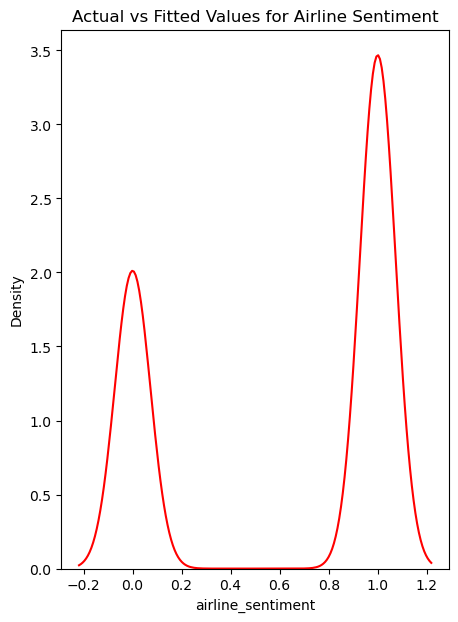

---------------------------------
SVC()
-----------------------------------


C:\Users\SONY\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\SONY\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\SONY\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\SONY\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

fit_time  mean  5.553553628921509
fit_time  std  0.793420324400876
score_time  mean  2.7470961570739747
score_time  std  0.3544102840676229
test_score  mean  0.546035142141337
test_score  std  0.11287939454847211


C:\Users\SONY\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\SONY\AppData\Local\Temp\ipykernel_4776\4280234824.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sb.distplot(y, hist=False, color="r", label="Actual Value")
C:\Users\SONY\AppData\Local\Temp\ipykernel_4776\4280234824.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figu

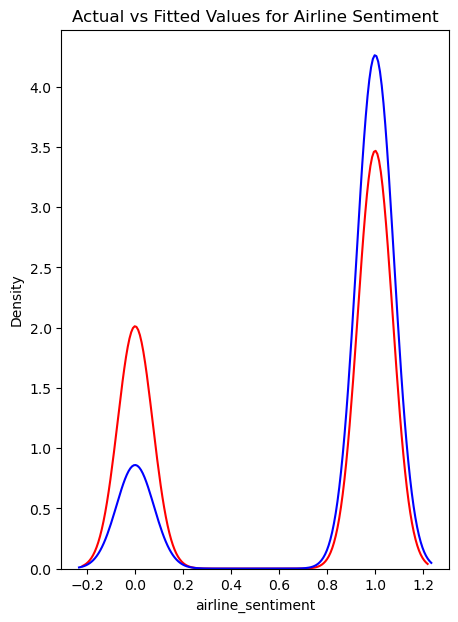

---------------------------------
KNeighborsClassifier(n_neighbors=3)
-----------------------------------


C:\Users\SONY\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\SONY\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\SONY\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\SONY\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples

fit_time  mean  0.03217945098876953
fit_time  std  0.006138895012818678
score_time  mean  0.43692893981933595
score_time  std  0.018680791241464784
test_score  mean  0.5127844336693894
test_score  std  0.12903354549088653


C:\Users\SONY\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\SONY\AppData\Local\Temp\ipykernel_4776\4280234824.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sb.distplot(y, hist=False, color="r", label="Actual Value")
C:\Users\SONY\AppData\Local\Temp\ipykernel_4776\4280234824.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figur

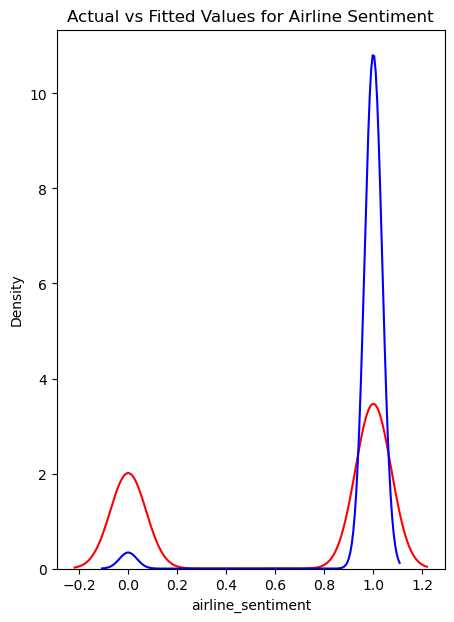

---------------------------------
DecisionTreeClassifier()
-----------------------------------
fit_time  mean  0.01079249382019043
fit_time  std  0.002709884847377427
score_time  mean  0.009194469451904297
score_time  std  0.0004010921814827832
test_score  mean  0.5409237556140212
test_score  std  0.11472037514594188


C:\Users\SONY\AppData\Local\Temp\ipykernel_4776\4280234824.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sb.distplot(y, hist=False, color="r", label="Actual Value")
C:\Users\SONY\AppData\Local\Temp\ipykernel_4776\4280234824.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(y_tes

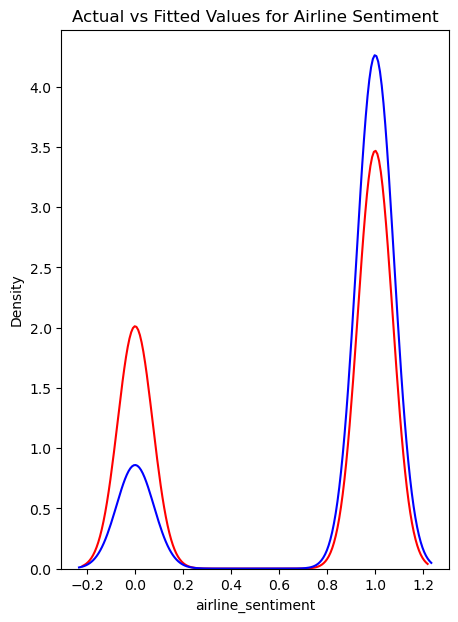

---------------------------------
RandomForestClassifier()
-----------------------------------


C:\Users\SONY\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\SONY\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\SONY\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\SONY\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exa

fit_time  mean  0.5210498809814453
fit_time  std  0.008458188727556375
score_time  mean  0.05916409492492676
score_time  std  0.0015988595470291433
test_score  mean  0.5411203641292136
test_score  std  0.11476995273039059


C:\Users\SONY\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\SONY\AppData\Local\Temp\ipykernel_4776\4280234824.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sb.distplot(y, hist=False, color="r", label="Actual Value")
C:\Users\SONY\AppData\Local\Temp\ipykernel_4776\4280234824.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a fi

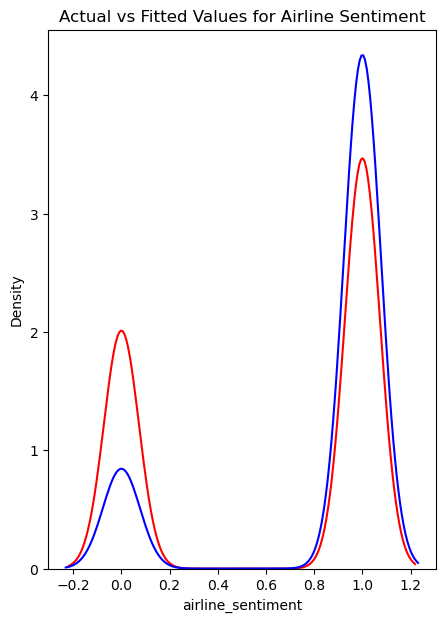

---------------------------------
GradientBoostingClassifier()
-----------------------------------


C:\Users\SONY\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\SONY\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\SONY\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\SONY\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ra

fit_time  mean  0.528308629989624
fit_time  std  0.020057662104569864
score_time  mean  0.013791418075561524
score_time  std  0.0031221975688608904
test_score  mean  0.5461333256023522
test_score  std  0.11248328066953733


C:\Users\SONY\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\SONY\AppData\Local\Temp\ipykernel_4776\4280234824.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sb.distplot(y, hist=False, color="r", label="Actual Value")
C:\Users\SONY\AppData\Local\Temp\ipykernel_4776\4280234824.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-le

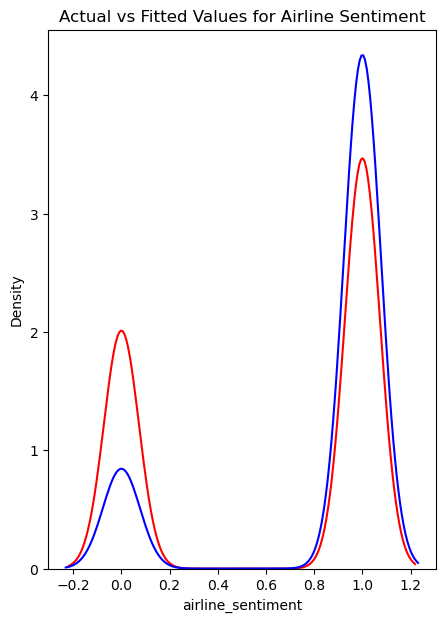

Fold 1:
---------------------------------
LogisticRegression()
-----------------------------------
fit_time  mean  0.023984289169311522
fit_time  std  0.0037390158951781842
score_time  mean  0.00819554328918457
score_time  std  0.00039963894336067214
test_score  mean  0.6053346669275873
test_score  std  0.08723329965527309


C:\Users\SONY\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\SONY\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\SONY\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\SONY\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

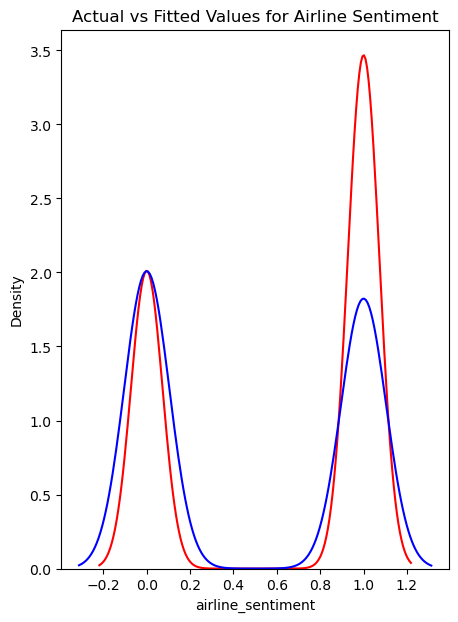

---------------------------------
SVC()
-----------------------------------


C:\Users\SONY\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\SONY\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\SONY\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\SONY\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

fit_time  mean  5.277239465713501
fit_time  std  0.449704989311837
score_time  mean  2.606386089324951
score_time  std  0.2581033023704749
test_score  mean  0.6058261157376201
test_score  std  0.08735688227824838


C:\Users\SONY\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\SONY\AppData\Local\Temp\ipykernel_4776\4280234824.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sb.distplot(y, hist=False, color="r", label="Actual Value")
C:\Users\SONY\AppData\Local\Temp\ipykernel_4776\4280234824.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figu

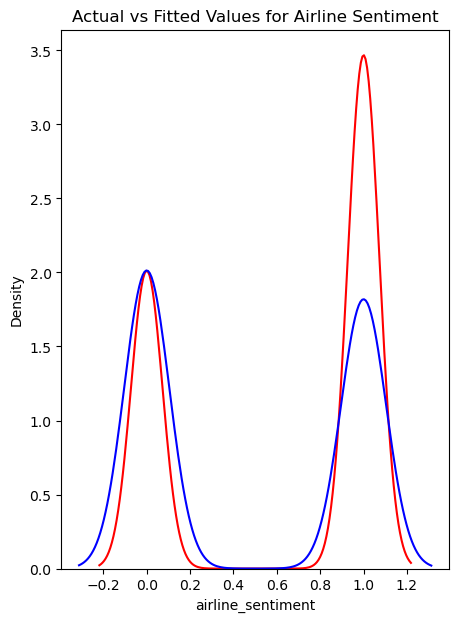

---------------------------------
KNeighborsClassifier(n_neighbors=3)
-----------------------------------


C:\Users\SONY\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\SONY\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\SONY\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\SONY\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples

fit_time  mean  0.03077845573425293
fit_time  std  0.0040148550054799545
score_time  mean  0.44012889862060545
score_time  std  0.07298668943910888
test_score  mean  0.527398500672837
test_score  std  0.13691155685658163


C:\Users\SONY\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\SONY\AppData\Local\Temp\ipykernel_4776\4280234824.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sb.distplot(y, hist=False, color="r", label="Actual Value")
C:\Users\SONY\AppData\Local\Temp\ipykernel_4776\4280234824.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figur

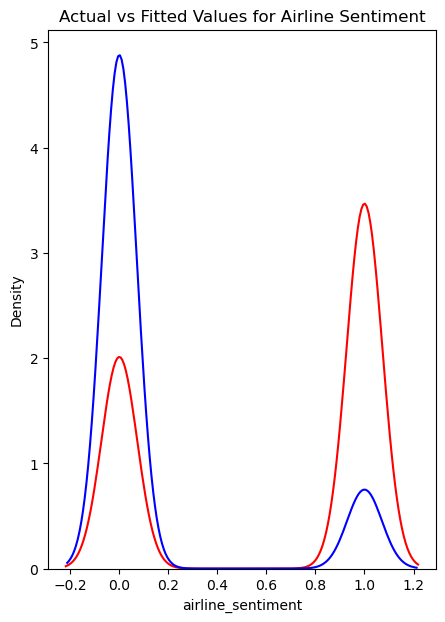

---------------------------------
DecisionTreeClassifier()
-----------------------------------
fit_time  mean  0.019186019897460938
fit_time  std  0.004664535504971163
score_time  mean  0.016190052032470703
score_time  std  0.0023129182455310787
test_score  mean  0.6040569773313136
test_score  std  0.08694995671683683


C:\Users\SONY\AppData\Local\Temp\ipykernel_4776\4280234824.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sb.distplot(y, hist=False, color="r", label="Actual Value")
C:\Users\SONY\AppData\Local\Temp\ipykernel_4776\4280234824.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(y_tes

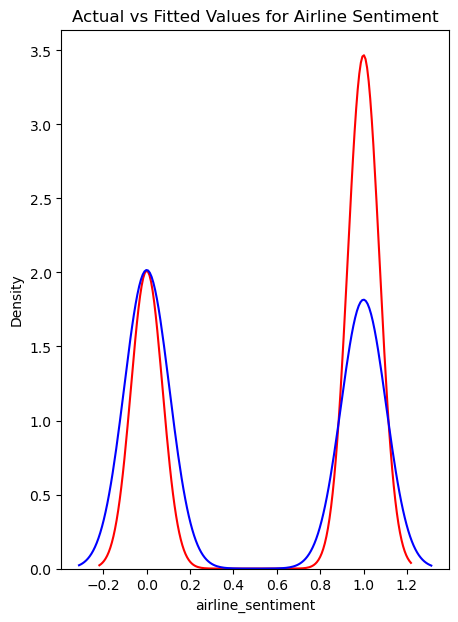

---------------------------------
RandomForestClassifier()
-----------------------------------


C:\Users\SONY\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\SONY\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\SONY\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\SONY\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exa

fit_time  mean  0.5476993083953857
fit_time  std  0.009372531846360383
score_time  mean  0.06316103935241699
score_time  std  0.003865208099159115
test_score  mean  0.6055312271241474
test_score  std  0.08749305650649285


C:\Users\SONY\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\SONY\AppData\Local\Temp\ipykernel_4776\4280234824.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sb.distplot(y, hist=False, color="r", label="Actual Value")
C:\Users\SONY\AppData\Local\Temp\ipykernel_4776\4280234824.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a fi

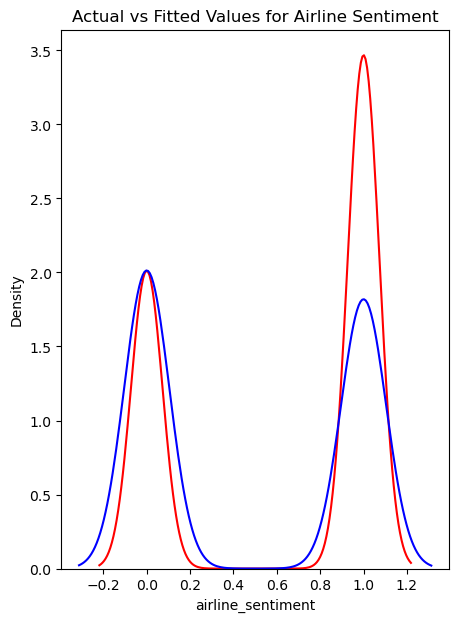

---------------------------------
GradientBoostingClassifier()
-----------------------------------


C:\Users\SONY\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
#Build a pipeline for SVM classification, LogisticRegression,...

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_validate

clfs = []
clfs.append(LogisticRegression())
clfs.append(SVC())
clfs.append(KNeighborsClassifier(n_neighbors=3))
clfs.append(DecisionTreeClassifier())
clfs.append(RandomForestClassifier())
clfs.append(GradientBoostingClassifier())

#building pipeline
pipeline = Pipeline([
    ('vectorizer', text_vectorizer()), #Step1 - vectorize data
    ('clf', LogisticRegression()) #step2 - classifier
])

# Create StratifiedKFold object.
skf = StratifiedKFold(n_splits=5)

# Splitting the data into features and labels
y = df.loc[:,'airline_sentiment']


for i, (train_index, test_index) in enumerate(skf.split(df, y)):
    print(f"Fold {i}:")  
    train = df.iloc[train_index,:]
    test = df.iloc[test_index,:]
    X= ['americanair','flight','united','usairways']  
    y = ['airline_sentiment']
    X_train = train[X]
    y_train = train[y]
    X_test = test[X]
    y_test = test[y]
    for classifier in clfs:
        print('---------------------------------')
        print(str(classifier))
        print('-----------------------------------')
        pipeline.set_params(clf=classifier)
        scores = cross_validate(pipeline[-1:], X_train, y_train, error_score='raise')       
        for key, values in scores.items():
                print(key,' mean ', values.mean())
                print(key,' std ', values.std())
        pipeline[-1:].fit(X_train,y_train)
        y_test_pred=pipeline[-1:].predict(X_test)        
        distplot(df['airline_sentiment'], y_test_pred )

In [47]:
def distplot(y, y_test_pred ):
    plt.figure(figsize=(5, 7))
    ax = sb.distplot(y, hist=False, color="r", label="Actual Value")
    sb.distplot(y_test_pred, hist=False, color="b", label="Fitted Values" , ax=ax)
    plt.title('Actual vs Fitted Values for Airline Sentiment')
    plt.show()

In [23]:
# Implement the report_results function to generate performance metrics (AUC, accuracy, F1 score, precision, recall) for the best estimator on the testing data.

def report_results(model,x_train, y_train,x_test, y_test):
    from sklearn.metrics import accuracy_score
    from sklearn.metrics import f1_score
    from sklearn.metrics import precision_score
    from sklearn.metrics import recall_score
    
    y_pred  = model.predict(x_test)    #testing model’s performance
    #accuracy
    print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))
    #F1 score
    print('F1 Score: %.3f' % f1_score(y_test, y_pred))
    # precision
    print('Precision: %.3f' % precision_score(y_test, y_pred))
    #recall
    print('Recall: %.3f' % recall_score(y_test, y_pred))

In [40]:
#Implement the get_roc_curve function to generate the ROC curve for the best estimator on the testing data.

def get_roc_curve(model,x_train, y_train,x_test, y_test):
    
    from sklearn.metrics import roc_curve
    from sklearn.metrics import roc_auc_score

    # generate a no skill prediction (majority class)
    ns_probs = [0 for _ in range(len(y_test))]
    # predict probabilities
    svm_probs = model.predict_proba(x_test)
    # keep probabilities for the positive outcome only
    svm_probs = svm_probs[:, 1]
    # calculate scores
    ns_auc = roc_auc_score(y_test, ns_probs)
    svm_auc = roc_auc_score(y_test, svm_probs)
    # summarize scores
    print('No Skill: ROC AUC=%.3f' % (ns_auc))
    print('SVM : ROC AUC=%.3f' % (svm_auc))
    # calculate roc curves
    ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
    svm_fpr, svm_tpr, _ = roc_curve(y_test, svm_probs)
    
    #Plot the ROC curve using matplotlib, with the false positive rate (FPR) on the x-axis and the true positive rate (TPR) on the y-axis.
    plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
    plt.plot(svm_fpr, svm_tpr, marker='.', label='SVM')
    # axis labels
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    # show the legend
    plt.legend()
    #Display the ROC curve plot.
    plt.show()



In [ ]:
#Use the best estimator to predict the sentiment of a sample tweet.
